# Manufacturing Defects

In [2]:
import zipfile
import os
import pandas as pd

# Define the zip file path
zip_file_path = 'Manufacturing Defects.zip'

# Step 1: Extract Data from Zip File
# ----------------------------------
# Extract the main zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files to the current directory
    zip_ref.extractall()
    # List the files in the zip file to understand what we have
    extracted_files = zip_ref.namelist()
    print("Files extracted from Manufacturing Defects.zip:")
    print(extracted_files)

Files extracted from Manufacturing Defects.zip:
['defects_data.csv']


In [4]:
# Load the CSV data into a pandas DataFrame
# Assuming there is a single CSV file inside the zip (modify this if there are multiple files)
csv_file_name = extracted_files[0]  # Select the first file, change if necessary

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_name)

# Step 3: Initial Data Exploration
# ---------------------------------

# View the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display dataset info (column names, non-null counts, and data types)
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# Summary for categorical features
print("\nSummary for Categorical Features:")
print(df.describe(include='object'))


First 5 rows of the dataset:
   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1          15  Structural    6/6/2024       Component     Minor   
1          2           6  Functional   4/26/2024       Component     Minor   
2          3          84  Structural   2/15/2024        Internal     Minor   
3          4          10  Functional   3/28/2024        Internal  Critical   
4          5          14    Cosmetic   4/26/2024       Component     Minor   

   inspection_method  repair_cost  
0  Visual Inspection       245.47  
1  Visual Inspection        26.87  
2  Automated Testing       835.81  
3  Automated Testing       444.47  
4     Manual Testing       823.64  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_i

In [ ]:
# Data Cleaning and Preprocessing

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming the dataset is already loaded into the DataFrame `df`

# Step 1: Handle Missing Values
# -----------------------------
print("\n--- Handling Missing Values ---")
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# No missing values were found, so we move on

# Step 2: Handle Duplicates
# -------------------------
print("\n--- Handling Duplicates ---")
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

# No duplicates found, so no need to drop any rows

# Step 3: Data Type Conversion (Encoding Categorical Variables)
# -------------------------------------------------------------
print("\n--- Encoding Categorical Features ---")

# Identifying categorical columns for encoding
categorical_columns = ['defect_type', 'defect_location', 'severity', 'inspection_method']

# Numerical columns
numerical_columns = ['repair_cost']

# Creating a ColumnTransformer to apply OneHotEncoder on categorical columns and leave numerical columns as is
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns),
        ('num', 'passthrough', numerical_columns)  # Keep numerical columns as they are
    ],
    remainder='passthrough'  # Keep other columns like 'defect_id', 'product_id', 'defect_date'
)

# Apply the transformation to the dataset
transformed_data = column_transformer.fit_transform(df)

# Create a DataFrame from the transformed data
transformed_columns = column_transformer.get_feature_names_out()
df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns)

print("\nFirst 5 Rows after Encoding:")
print(df_transformed.head())

# Step 4: Scaling Numerical Features
# ----------------------------------
print("\n--- Scaling Numerical Features ---")

# Apply StandardScaler to scale numerical features like 'repair_cost'
scaler = StandardScaler()

# Perform scaling only on the 'repair_cost' column
df_transformed['num__repair_cost'] = scaler.fit_transform(df_transformed[['num__repair_cost']])

print("\nFirst 5 Rows after Scaling:")
print(df_transformed.head())

# Final check of dataset
print("\n--- Final DataFrame Info ---")
print(df_transformed.info())


--- Handling Missing Values ---
defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
dtype: int64

--- Handling Duplicates ---
Number of duplicate rows found: 0

--- Encoding Categorical Features ---

First 5 Rows after Encoding:
  cat__defect_type_Functional cat__defect_type_Structural  \
0                         0.0                         1.0   
1                         1.0                         0.0   
2                         0.0                         1.0   
3                         1.0                         0.0   
4                         0.0                         0.0   

  cat__defect_location_Internal cat__defect_location_Surface  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           1.0                          0.0   
3              

In [10]:
# Convert object columns that should be numerical
df_transformed[['cat__defect_type_Functional', 'cat__defect_type_Structural', 
                'cat__defect_location_Internal', 'cat__defect_location_Surface', 
                'cat__severity_Minor', 'cat__severity_Moderate', 
                'cat__inspection_method_Manual Testing', 
                'cat__inspection_method_Visual Inspection']] = \
    df_transformed[['cat__defect_type_Functional', 'cat__defect_type_Structural', 
                    'cat__defect_location_Internal', 'cat__defect_location_Surface', 
                    'cat__severity_Minor', 'cat__severity_Moderate', 
                    'cat__inspection_method_Manual Testing', 
                    'cat__inspection_method_Visual Inspection']].astype(float)

# Drop unnecessary columns for analysis
df_transformed = df_transformed.drop(['remainder__defect_id', 'remainder__product_id', 'remainder__defect_date'], axis=1)

print("\nUpdated DataFrame Info:")
print(df_transformed.info())

print("\nFirst 5 Rows of Final DataFrame:")
print(df_transformed.head())


Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   cat__defect_type_Functional               1000 non-null   float64
 1   cat__defect_type_Structural               1000 non-null   float64
 2   cat__defect_location_Internal             1000 non-null   float64
 3   cat__defect_location_Surface              1000 non-null   float64
 4   cat__severity_Minor                       1000 non-null   float64
 5   cat__severity_Moderate                    1000 non-null   float64
 6   cat__inspection_method_Manual Testing     1000 non-null   float64
 7   cat__inspection_method_Visual Inspection  1000 non-null   float64
 8   num__repair_cost                          1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB
None

First 5 Rows of Final DataFrame:
   cat__d

In [ ]:
#  Exploratory Data Analysis (EDA


--- Distribution Analysis ---


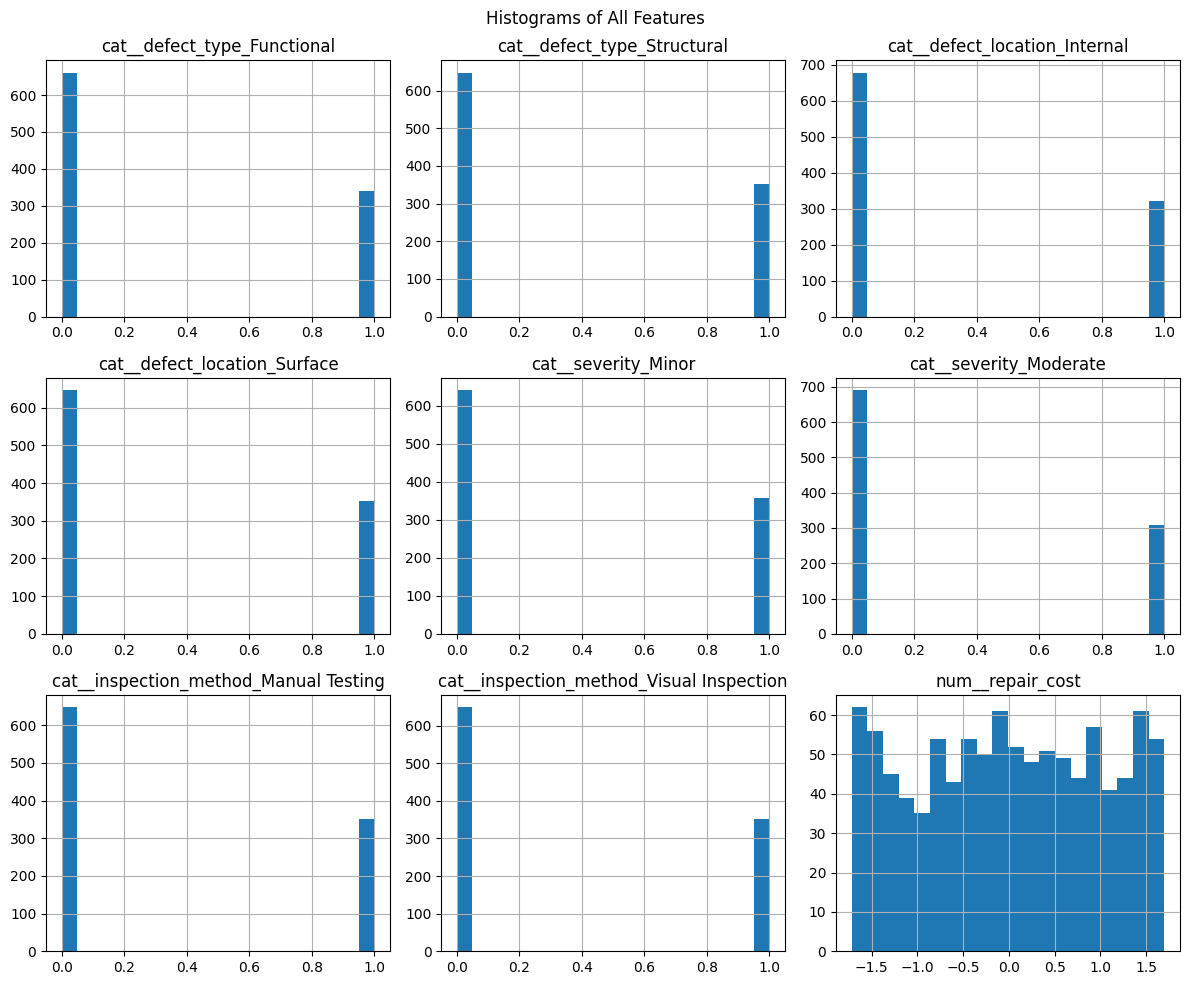

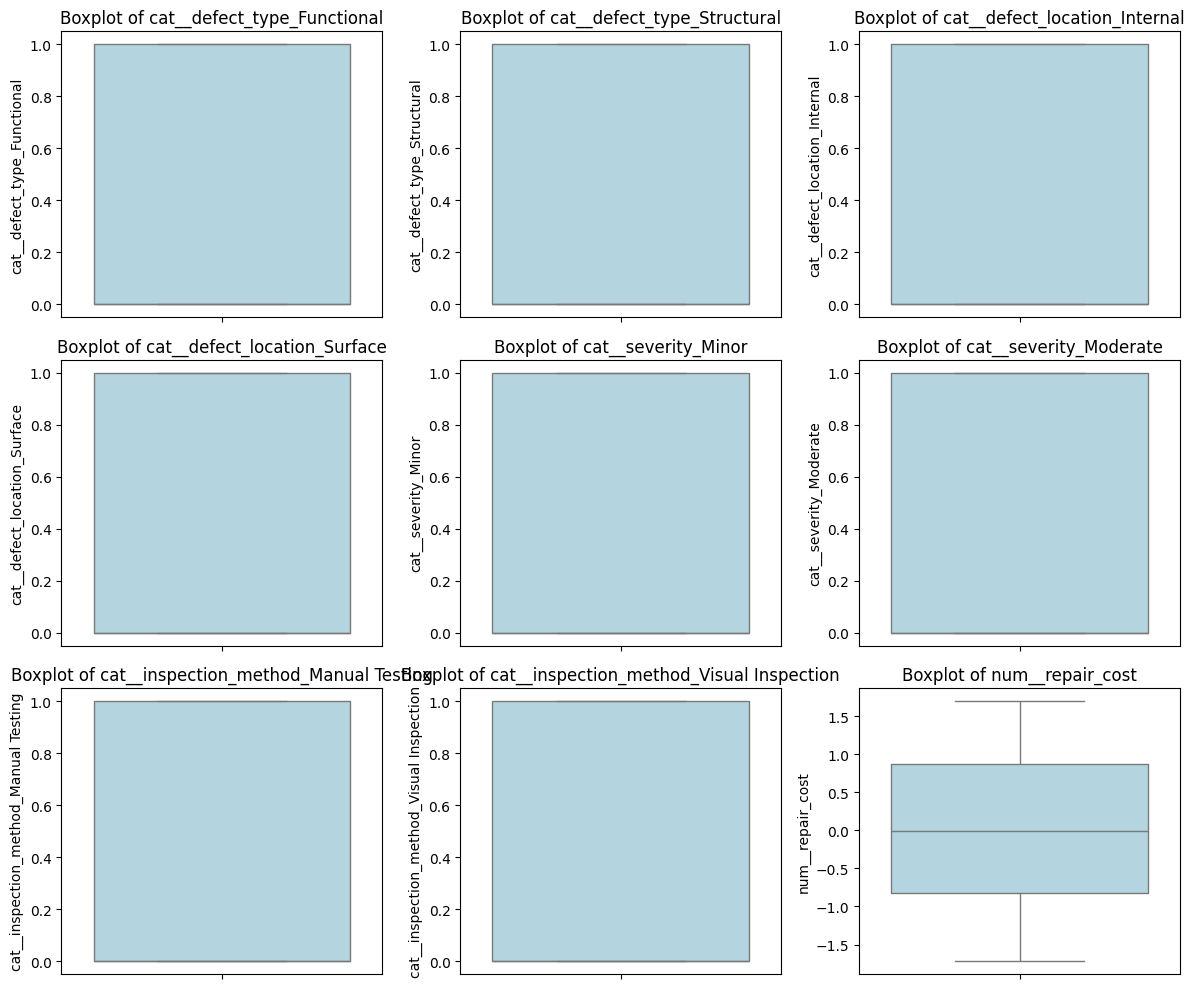


--- Correlation Analysis ---


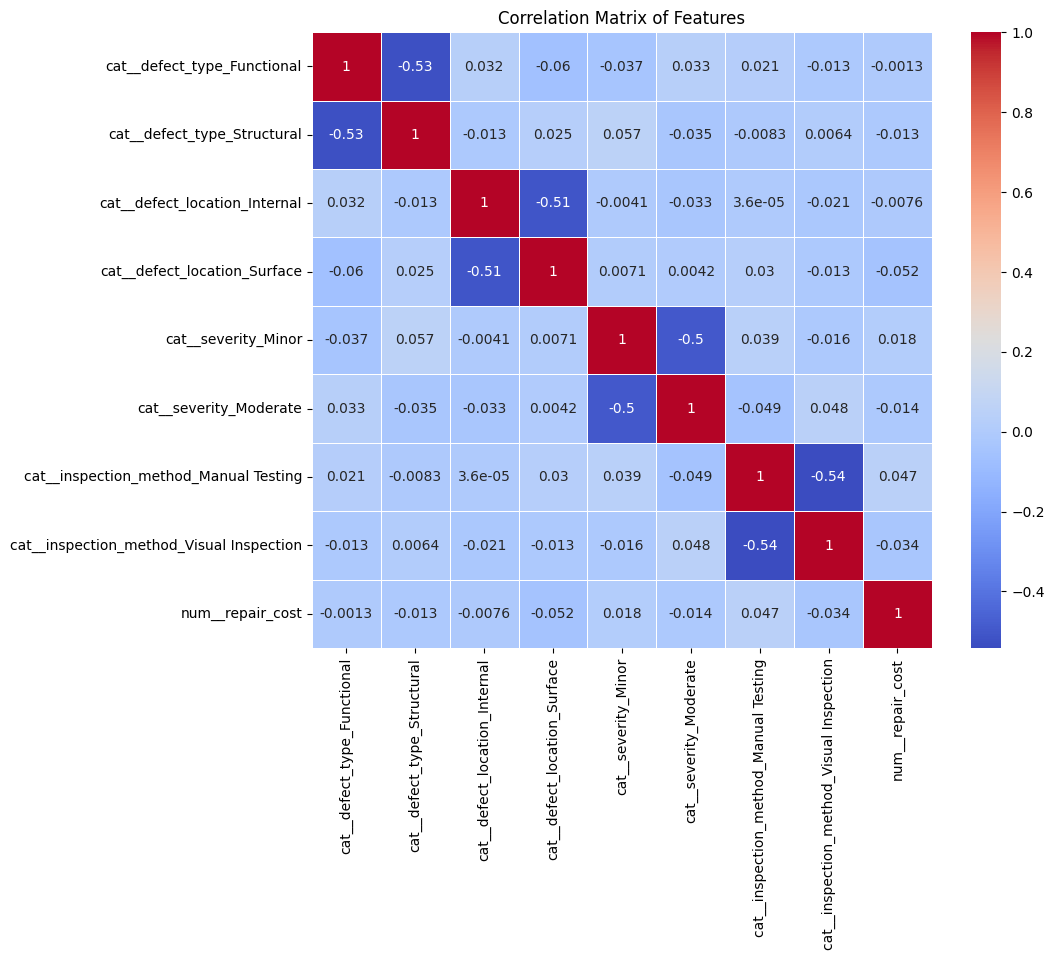


--- Outlier Detection ---
Number of outliers in cat__defect_type_Functional: 0
Number of outliers in cat__defect_type_Structural: 0
Number of outliers in cat__defect_location_Internal: 0
Number of outliers in cat__defect_location_Surface: 0
Number of outliers in cat__severity_Minor: 0
Number of outliers in cat__severity_Moderate: 0
Number of outliers in cat__inspection_method_Manual Testing: 0
Number of outliers in cat__inspection_method_Visual Inspection: 0
Number of outliers in num__repair_cost: 0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Distribution Analysis
# -----------------------------
print("\n--- Distribution Analysis ---")

# Plot histograms for all features
df_transformed.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of All Features')
plt.tight_layout()
plt.show()

# Plot box plots to identify potential outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(df_transformed.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_transformed[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 2: Correlation Analysis
# ----------------------------
print("\n--- Correlation Analysis ---")
# Compute the correlation matrix
corr_matrix = df_transformed.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Step 3: Outlier Detection (Using IQR Method)
# --------------------------------------------
print("\n--- Outlier Detection ---")
# Define a function for detecting outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    return outliers

# Check for outliers in numerical features
for col in df_transformed.select_dtypes(include=['float64']).columns:
    detect_outliers_iqr(df_transformed, col)

In [ ]:
# Feature Engineering

In [20]:
# Step 1: Create New Features
# ----------------------------

# Example 1: Defects Over Time
print("\n--- Creating New Features ---")

# Convert `defect_date` to datetime format
df_transformed['defect_date'] = pd.to_datetime(df['defect_date'])

# Create new feature: 'defect_month' to capture how many defects occurred each month
df_transformed['defect_month'] = df_transformed['defect_date'].dt.to_period('M')

# Example 2: Map defect severity to numerical values for ordinal feature
severity_mapping = {
    'Minor': 1,
    'Moderate': 2,
    'Critical': 3
}
df_transformed['severity_level'] = df['severity'].map(severity_mapping)

# Example 3: Average repair cost per defect type (using the original df where defect_type exists)
avg_repair_cost_per_type = df.groupby('defect_type')['repair_cost'].transform('mean')
df_transformed['avg_repair_cost_per_type'] = avg_repair_cost_per_type

print("\nFirst 5 Rows after Feature Engineering:")
print(df_transformed.head())


--- Creating New Features ---

First 5 Rows after Feature Engineering:
   cat__defect_type_Functional  cat__defect_type_Structural  \
0                          0.0                          1.0   
1                          1.0                          0.0   
2                          0.0                          1.0   
3                          1.0                          0.0   
4                          0.0                          0.0   

   cat__defect_location_Internal  cat__defect_location_Surface  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            1.0                           0.0   
3                            1.0                           0.0   
4                            0.0                           0.0   

   cat__severity_Minor  cat__severity_Moderate  \
0                  1.0                     0.0   
1                  1.0                     0.0   
2 

In [22]:
# Step 2: Feature Selection
# -------------------------

import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example 1: Variance Thresholding
print("\n--- Feature Selection ---")

# Remove non-numeric columns before applying variance threshold
numeric_columns = df_transformed.select_dtypes(include=[np.number]).columns

# Use only the numeric columns for variance thresholding
df_numeric = df_transformed[numeric_columns]

# Use a variance threshold of 0.01 (customizable)
var_threshold = VarianceThreshold(threshold=0.01)
df_high_variance = var_threshold.fit_transform(df_numeric)

# Get the names of the remaining features after variance thresholding
remaining_features = df_numeric.columns[var_threshold.get_support()]
print(f"\nFeatures remaining after variance thresholding: {len(remaining_features)}")
print(f"Remaining Features: {list(remaining_features)}")

# Example 2: Correlation Analysis for Feature Selection
print("\n--- Correlation Analysis for Feature Selection ---")

# Compute correlation matrix for numeric columns
corr_matrix = pd.DataFrame(df_high_variance, columns=remaining_features).corr()

# Set threshold for correlation, e.g., 0.85
threshold = 0.85
to_drop = [col for col in corr_matrix.columns 
           if any(corr_matrix[col].abs() > threshold) and col != corr_matrix[col].idxmax()]

# Drop correlated features
df_uncorrelated = df_transformed.drop(columns=to_drop)
print(f"Columns dropped due to high correlation: {to_drop}")

# Remove any date columns (e.g., 'defect_date') from the dataset for model training
df_uncorrelated = df_uncorrelated.drop(columns=['defect_date', 'defect_month'], errors='ignore')

# Example 3: Model-Based Feature Selection using Random Forest
print("\n--- Model-Based Feature Selection ---")

# Assuming `severity_level` is our target for classification and we're using other features as predictors
X = df_uncorrelated.drop(columns=['severity_level'], errors='ignore')  # Ensure no error if 'severity_level' is missing
y = df_uncorrelated['severity_level']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that X_train contains only numeric values (no Timestamps or object columns)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort and display feature importances
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("\n--- Feature Importance ---")
print(importance_df)

# Select the top N features (e.g., top 10)
top_n_features = importance_df['feature'].head(10).tolist()
print(f"\nTop N important features selected: {top_n_features}")


--- Feature Selection ---

Features remaining after variance thresholding: 11
Remaining Features: ['cat__defect_type_Functional', 'cat__defect_type_Structural', 'cat__defect_location_Internal', 'cat__defect_location_Surface', 'cat__severity_Minor', 'cat__severity_Moderate', 'cat__inspection_method_Manual Testing', 'cat__inspection_method_Visual Inspection', 'num__repair_cost', 'severity_level', 'avg_repair_cost_per_type']

--- Correlation Analysis for Feature Selection ---
Columns dropped due to high correlation: []

--- Model-Based Feature Selection ---

--- Feature Importance ---
                                    feature  importance
4                       cat__severity_Minor    0.484360
5                    cat__severity_Moderate    0.461425
8                          num__repair_cost    0.037790
2             cat__defect_location_Internal    0.003163
6     cat__inspection_method_Manual Testing    0.002895
3              cat__defect_location_Surface    0.002665
9                 

In [ ]:
# Modeling

Model Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        60

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



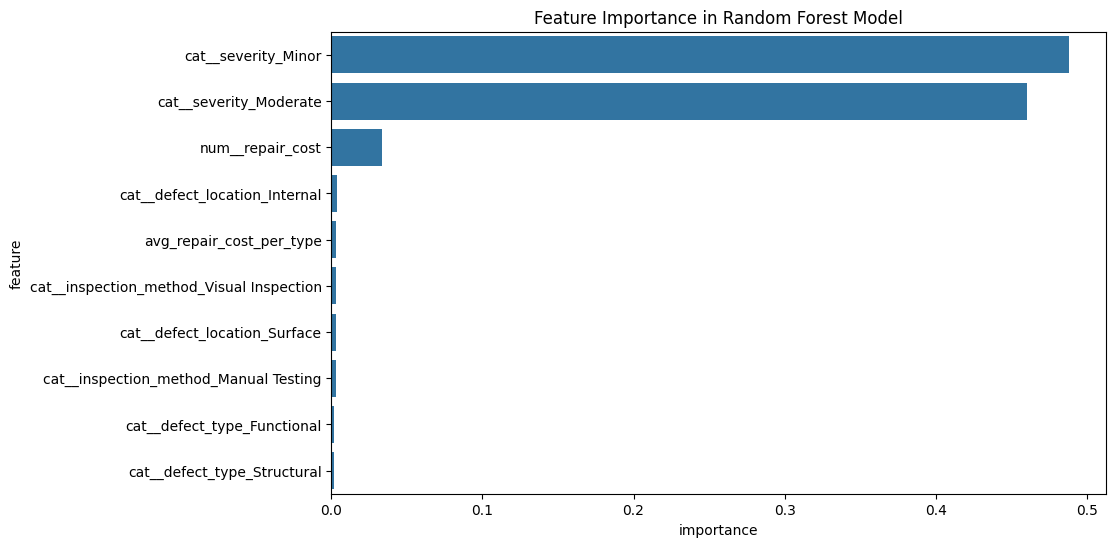

In [24]:
# Step 1: Model Selection and Setup
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Prepare Data for Modeling
# We already selected the top features, now we'll use those features for modeling
X = df_transformed[top_n_features]  # Features selected from feature importance
y = df_transformed['severity_level']  # Target variable (severity_level)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predict the labels for the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Feature Importance Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [ ]:
# Model Evaluation

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        60

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



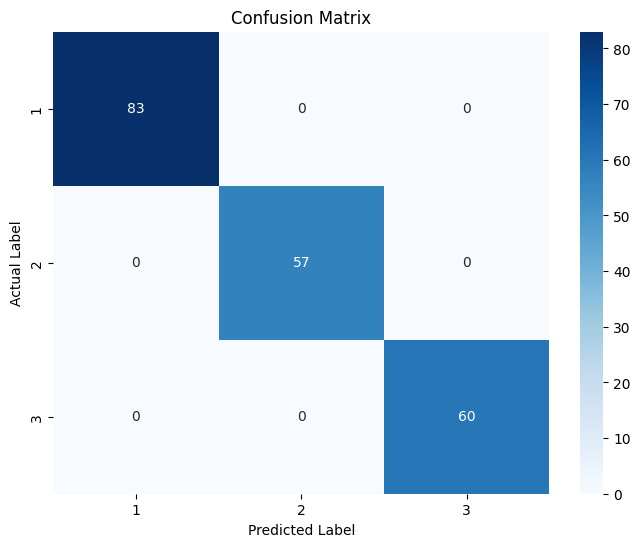


Cross-Validation (KFold=5) Results:
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1 Score: 1.0000 ± 0.0000


In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Evaluate Model on Test Set
# ----------------------------------

# Predict the labels for the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
report = classification_report(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Step 2: Cross-Validation using K-Fold
# -------------------------------------
# Using 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate accuracy using cross_val_score
cv_accuracy = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(rf_model, X, y, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(rf_model, X, y, cv=kf, scoring='recall_weighted')
cv_f1 = cross_val_score(rf_model, X, y, cv=kf, scoring='f1_weighted')

# Display Cross-Validation Results
print(f"\nCross-Validation (KFold=5) Results:")
print(f"Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

In [ ]:
# Overfitting: The model might have memorized the training data perfectly and is not generalizing well to new data. This often happens when the dataset is small or lacks sufficient complexity.
# Data Leakage: There might be some unintended leakage of information from the training data into the test data (for example, using a feature derived from the target variable), which could cause artificially high performance.
# Very Simple Problem: It’s also possible that the problem is inherently simple or that the dataset is very well structured, making it easy for the model to achieve perfect accuracy.